Load the 📊`tidyverse`, 🐧`palmerpengions`, and ⚖`scales` packages.

In [1]:
library('tidyverse')
library('palmerpenguins')
library('scales')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘palmerpenguins’ was built under R version 4.1.3”

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [3]:
penguins |> head()

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


Use `geom_density` to create the following figure from the `penguins` data.

<img src="https://raw.githubusercontent.com/chuckpr/BIOS512/main/in-class-exercises/06/palmer-kde.png" 
     style="width: 700px;" />

Warning message:
“Removed 2 rows containing non-finite values (stat_density).”


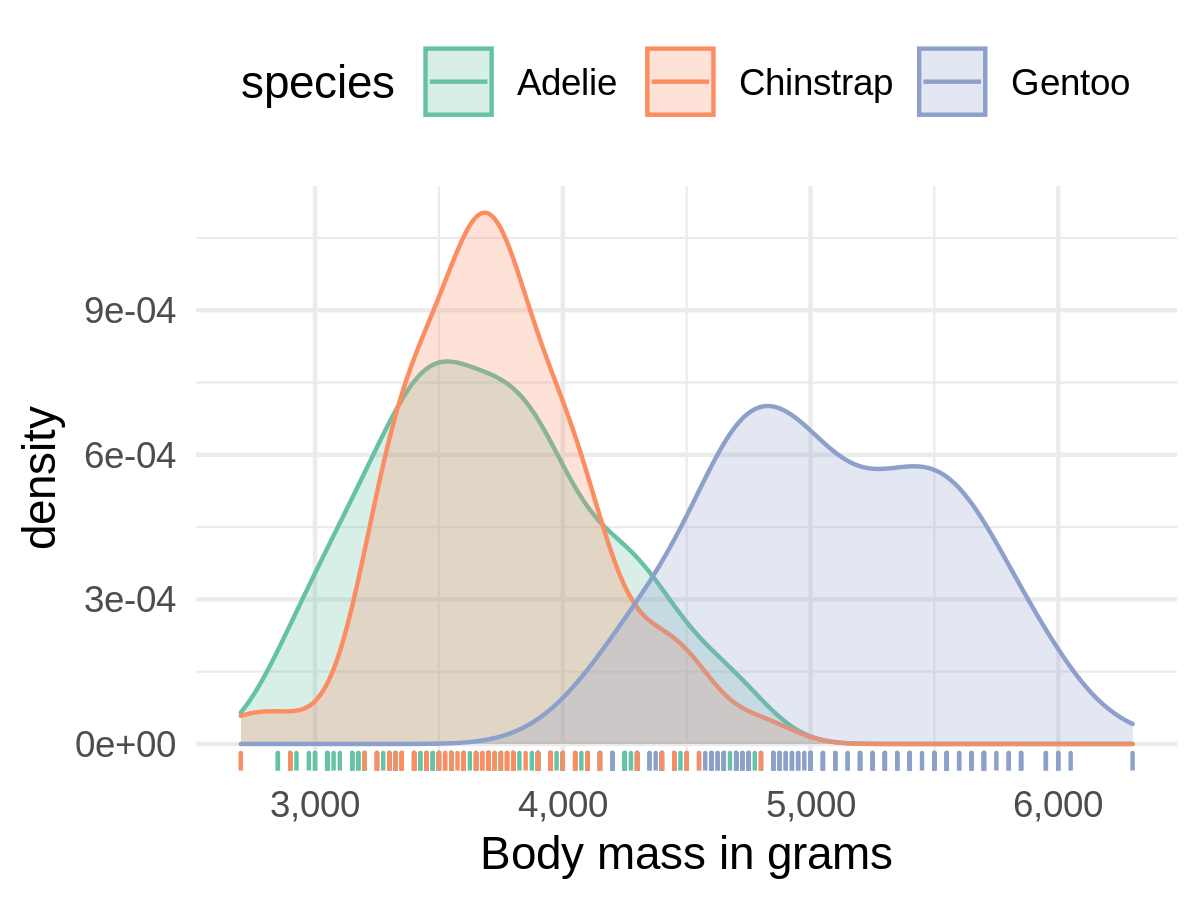

In [2]:
options(repr.plot.height = 3, repr.plot.width = 4)

p = ggplot(penguins, aes(x=body_mass_g, color=species, fill=species)) + 
    geom_density(alpha=0.25) + 
    geom_rug() +
    scale_color_brewer(palette = 'Set2') + 
    scale_fill_brewer(palette = 'Set2') + 
    scale_x_continuous(labels=comma_format()) +
    theme_minimal() +
    theme(legend.position = 'top') +
    labs(x='Body mass in grams')
p

🛑 **STOP HERE** 🛑

What columns do we need to make the **ECDF** equivalent of the above chart using `geom_point` + `geom_line`?

Read the following code snippet. Can you make sense of what it's doing? What do you think the output will be?

```R
ecdf = penguins %>%
    arrange(body_mass_g) %>%
    group_by(species) %>%
    mutate(rn = row_number(), fraction_of_penguins = rn / max(rn))
```

Copy the snippet above and execute it. What's does the `ecdf` table look like?

In [14]:
ecdf = penguins %>%
    arrange(body_mass_g) %>%
    group_by(species) %>%
    mutate(rn = row_number(), fraction_of_penguins = rn / max(rn))

ecdf |> head()

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,rn,fraction_of_penguins
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>,<int>,<dbl>
Chinstrap,Dream,46.9,16.6,192,2700,female,2008,1,0.014705882
Adelie,Biscoe,36.5,16.6,181,2850,female,2008,1,0.006578947
Adelie,Biscoe,36.4,17.1,184,2850,female,2008,2,0.013157895
Adelie,Biscoe,34.5,18.1,187,2900,female,2008,3,0.019736842
Adelie,Dream,33.1,16.1,178,2900,female,2008,4,0.026315789
Adelie,Torgersen,38.6,17.0,188,2900,female,2009,5,0.032894737


Using the `ecdf` table, create an **ECDF** chart of penguin body mass grouped by species.

Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 2 row(s) containing missing values (geom_path).”


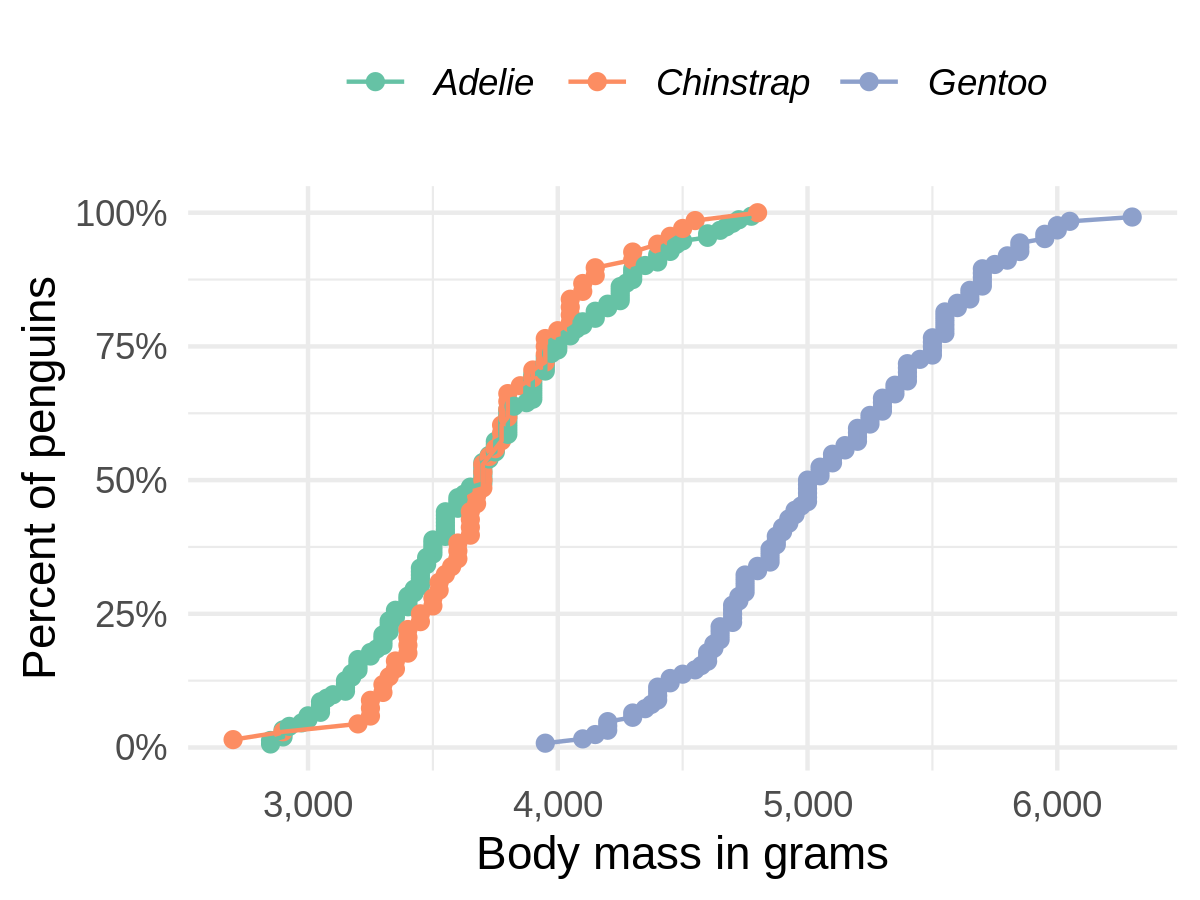

In [24]:
g = ggplot(ecdf, aes(x=body_mass_g, y=fraction_of_penguins, color=species)) + 
    geom_point() +
    geom_line() + 
    scale_y_continuous(labels = percent_format()) + 
    scale_color_brewer(palette = 'Set2') + 
    labs(x='Body mass in grams', y= 'Percent of penguins', color = '')  + 
    scale_x_continuous(labels=comma_format()) +
    theme_minimal() + theme(legend.position = 'top', legend.text = element_text(face = 'italic'))
#setting color to empty string removes the species label
g

Uncomment the code below, change the cell to markdown and execute if you want to see my solution.

![](https://raw.githubusercontent.com/chuckpr/BIOS512/main/in-class-exercises/06/palmer-ecdf.png)